# Project Task: Week 1
## Data Exploration:

#### 1. Read data and Perform descriptive analysis :

In [1]:
# Importing Necessary Liabraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import os
os.getcwd()

'H:\\Simplilearn\\CAPSTONE PROJECT\\Project_2'

In [3]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'Case Study - healthcare Industry.docx',
 'Healthcare - Diabetes',
 'healthcare appointment data.csv',
 'Healthcare Project.ipynb',
 'train.csv']

In [4]:
# Loading the dataset
df = pd.read_csv(r"H:\Simplilearn\CAPSTONE PROJECT\Project_2\Healthcare - Diabetes\health care diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Printing number of unique values in a column
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


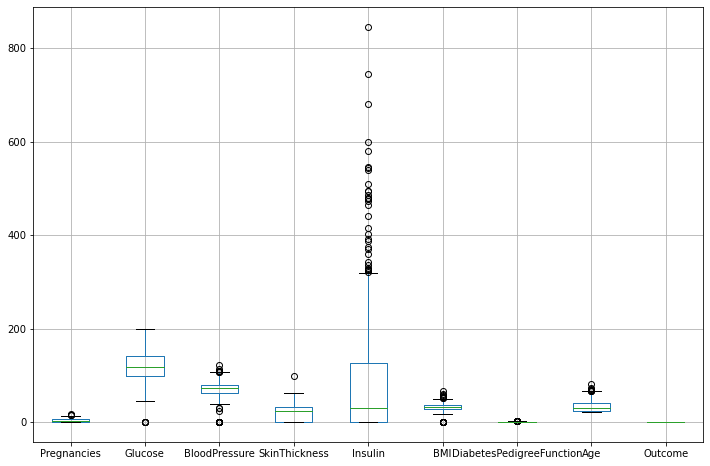

In [9]:
plt.figure(figsize = (12,8))
df.boxplot()
plt.show()

In [10]:
# Size of the dataset
df.shape

(768, 9)

#### According to problem statement, a value of zero in the following columns indicates missing value:

In [11]:
# Checking the 'Zero' values in following columns
df[df[["Glucose","Insulin", "BMI","BloodPressure","SkinThickness"]]==0].count()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [12]:
# Median Values before excluding the Zeros

print('Insulin Median :', df["Insulin"].median())
print("Glucose Median :",df["Glucose"].median())
print("BloodPressure Median :", df["BloodPressure"].median())
print("BMI Median :", df["BMI"].median())
print("SkinThickness Median :",df["SkinThickness"].median())

Insulin Median : 30.5
Glucose Median : 117.0
BloodPressure Median : 72.0
BMI Median : 32.0
SkinThickness Median : 23.0


In [13]:
# Median Values after exclusing the Zeros

print('Insulin Median :', df[df["Insulin"]!=0]["Insulin"].median())
print("Glucose Median :",df[df["Glucose"]!=0]["Glucose"].median())
print("BloodPressure Median :", df[df["BloodPressure"]!=0]["BloodPressure"].median())
print("BMI Median :", df[df["BMI"]!=0]["BMI"].median())
print("SkinThickness Median :",df[df["SkinThickness"]!=0]["SkinThickness"].median())

Insulin Median : 125.0
Glucose Median : 117.0
BloodPressure Median : 72.0
BMI Median : 32.3
SkinThickness Median : 29.0


#### 2. Treat Missing Values

In [14]:
for i in ["Glucose","Insulin", "BMI","BloodPressure","SkinThickness"]:
    median_value_nonzero = df[df[i]!=0][i].median() 
    df[i].replace(0,median_value_nonzero, inplace=True)

In [15]:
df[df[["Glucose","Insulin", "BMI","BloodPressure","SkinThickness"]]==0].count()/len(df)*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

#### 3. Visually explore these variables using histograms

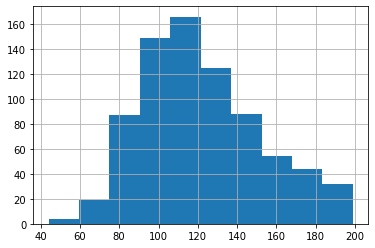

In [16]:
df["Glucose"].hist();

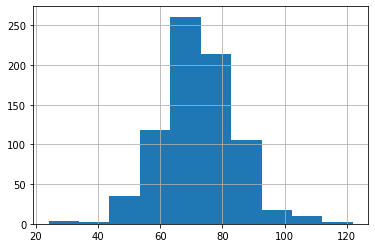

In [17]:
df["BloodPressure"].hist();

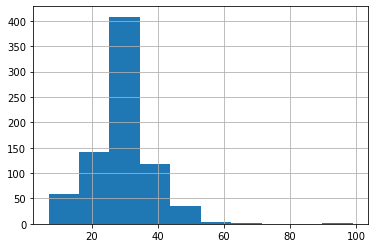

In [18]:
df["SkinThickness"].hist();

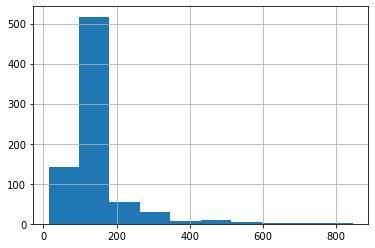

In [19]:
df["Insulin"].hist();

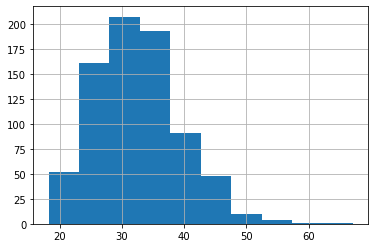

In [20]:
df["BMI"].hist();

#### 4. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

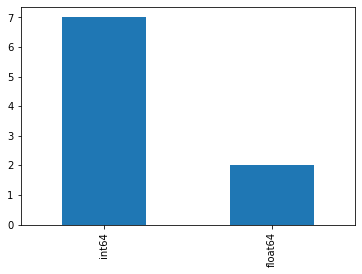

In [21]:
df.dtypes.value_counts().plot(kind="bar")
plt.show()

### Data Exploration:

#### 1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [22]:
df.Outcome.value_counts(normalize=True)*100
# Normalize will make it in percentage values

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

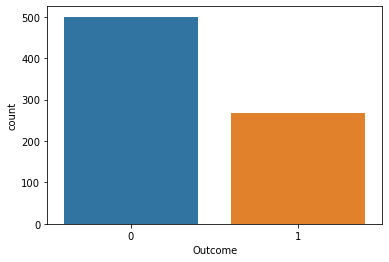

In [23]:
sns.countplot(df["Outcome"])
plt.show()

### Results :
#### Since classes in Outcome is little skewed so we should generate new samples using SMOTE (Synthetic Minority Oversampling Technique) for the class '1' which isunder-represented in our data. 
#### We will use SMOTE out of many other techniques available since:
#### 1. It generates new samples by interpolation.
#### 2. It doesn't duplicate data.


In [24]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [25]:
X.shape, y.shape

((768, 8), (768,))

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
X_resampled, y_resampled = SMOTE(random_state=108).fit_resample(X,y)

In [28]:
X_resampled.shape, y_resampled.shape

((1000, 8), (1000,))

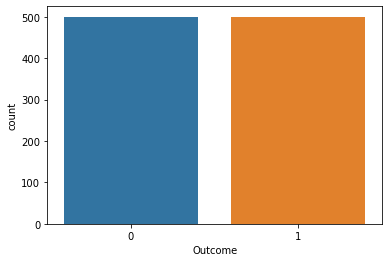

In [29]:
sns.countplot(y_resampled)
plt.show()

#### 2.Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

In [30]:
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [31]:
df_resampled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df_resampled.shape

(1000, 9)

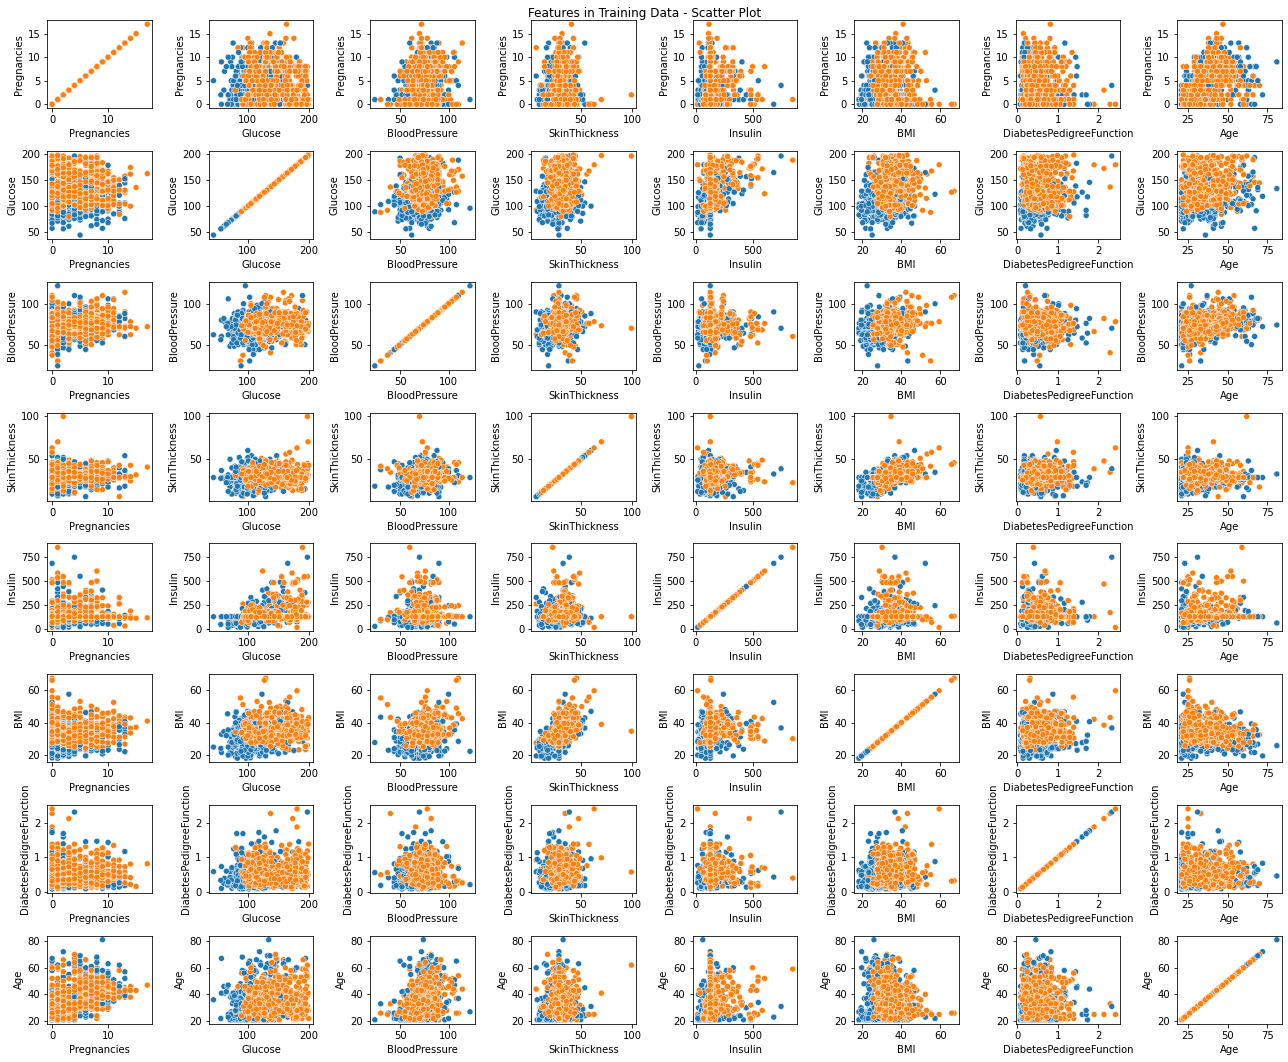

In [33]:
fig, axes = plt.subplots(8, 8, figsize=(18, 15))
fig.suptitle('Features in Training Data - Scatter Plot')
for i, col_y in enumerate(X_resampled.columns):
    for j, col_x in enumerate(X_resampled.columns):
        sns.scatterplot(ax=axes[i, j], x=col_x, y=col_y, data=df_resampled, hue="Outcome", legend = False)
plt.tight_layout()

### Results:
#### We have some interesting observations from above scatter plot of pairs of features:
#### Glucose alone and Age are impressively good to distinguish between the Outcome classes.

### 3. Perform correlation analysis. Visually explore it using a heat map.

In [34]:
df_resampled.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.079553,0.203742,0.079254,0.009484,0.017882,-0.034635,0.533695,0.193235
Glucose,0.079553,1.000000,0.197599,0.185318,0.419031,0.243554,0.138150,0.235374,0.497768
BloodPressure,0.203742,0.197599,1.000000,0.173497,0.033768,0.276310,-0.005797,0.329735,0.154350
SkinThickness,0.079254,0.185318,0.173497,1.000000,0.169171,0.536501,0.121514,0.114224,0.221526
Insulin,0.009484,0.419031,0.033768,0.169171,1.000000,0.168228,0.116046,0.097081,0.200320
BMI,0.017882,0.243554,0.276310,0.536501,0.168228,1.000000,0.176796,0.016427,0.333925
DiabetesPedigreeFunction,-0.034635,0.138150,-0.005797,0.121514,0.116046,0.176796,1.000000,0.012266,0.183403
Age,0.533695,0.235374,0.329735,0.114224,0.097081,0.016427,0.012266,1.000000,0.233804
Outcome,0.193235,0.497768,0.154350,0.221526,0.200320,0.333925,0.183403,0.233804,1.000000


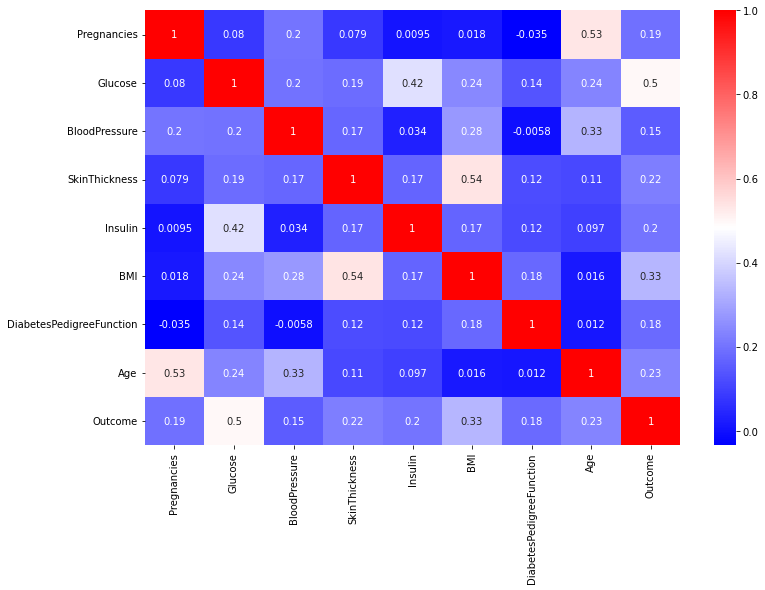

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(df_resampled.corr() , cmap= 'bwr', annot = True);

### Results:
#### It appears from correlation matrix and heatmap that "Age-Pregnancies" and "BMI-SkinThickness" have significant correlation between them.

## Data Modeling :

### 1. Devise strategies for model building. It is important to decide the right validation framework.
#### Express your thought process:
Answer: Since this is a classification problem, we will be building all popular classification models for our training data and
then compare performance of each model on test data to accurately predict target variable (Outcome):
1) Logistic Regression 

2) Decision Tree

3) RandomForest Classifier

4) K-Nearest Neighbour (KNN) 

5) Support Vector Machine (SVM)

6) Ensemble Learning -> Boosting -> Gradient Boosting (XGBClassifier)

7) Naive Bayes

In [36]:
### Splitting the dataset into Training and testing parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.25, random_state = 108)

In [37]:
models = []
model_accuracy =[]
model_f1 = []
model_auc =[]

## 1. Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score, roc_curve, precision_recall_curve,f1_score, average_precision_score
from sklearn.metrics import accuracy_score

In [39]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [40]:
lr.score(X_train, y_train)

0.7253333333333334

In [41]:
lr.score(X_test, y_test)

0.76

AUC Score : 0.851


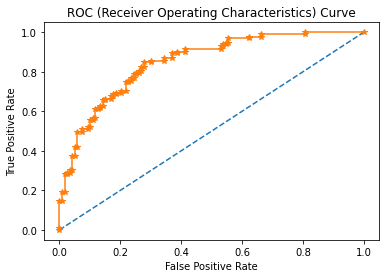

In [42]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = lr.predict_proba(X_test)       # predict probabilities
probs = probs[:, 1]                    # keep probabilities for the positive outcome only
auc_lr = roc_auc_score(y_test, probs)  # calculate AUC
print('AUC Score : %.3f' %auc_lr)
fpr, tpr, thresholds = roc_curve(y_test, probs) # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')        
plt.plot(fpr, tpr, marker='*')                  # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");


f1=0.764 auc_pr=0.856 ap=0.857


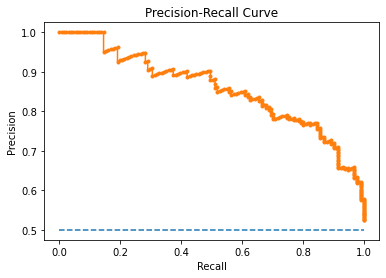

In [43]:
# Precision Recall Curve 

pred_y_test = lr.predict(X_test)                                      # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_lr_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_lr_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");


In [44]:
models.append("LR")
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_lr)

## 2. Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [47]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
dt.score(X_train, y_train)

1.0

In [49]:
dt.score(X_test, y_test)

0.8

In [50]:
dt.feature_importances_

array([0.04859986, 0.3069925 , 0.06180959, 0.0348011 , 0.1012355 ,
       0.15061784, 0.11225247, 0.18369114])

In [51]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

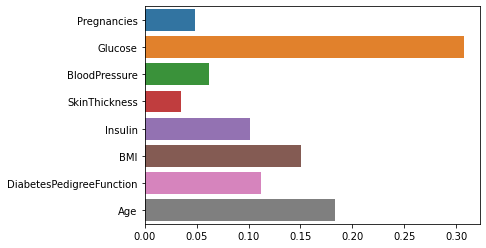

In [52]:
sns.barplot(y=X_train.columns, x=dt.feature_importances_)
plt.show()

AUC Score : 0.851


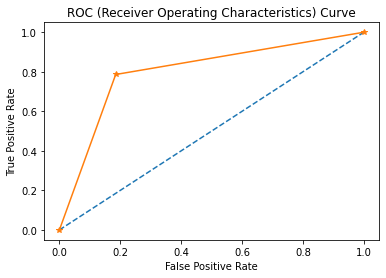

In [53]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = dt.predict_proba(X_test)       # predict probabilities
probs = probs[:, 1]                    # keep probabilities for the positive outcome only
auc_dt = roc_auc_score(y_test, probs)  # calculate AUC
print('AUC Score : %.3f' %auc_lr)
fpr, tpr, thresholds = roc_curve(y_test, probs) # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')        
plt.plot(fpr, tpr, marker='*')                  # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.show()

f1=0.805 auc_pr=0.861 ap=0.760


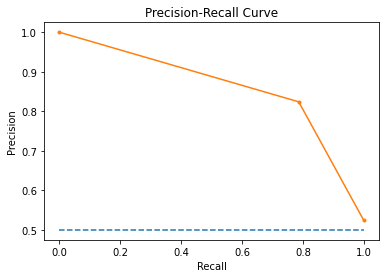

In [54]:
# Precision Recall Curve 

pred_y_test = dt.predict(X_test)                                      # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve

f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_dt_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_dt_pr, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [55]:
models.append("DT")
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_dt)

## 3. Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier()

In [58]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
rf.score(X_train, y_train)

1.0

In [60]:
rf.score(X_test, y_test)

0.804

AUC Score :0.922 


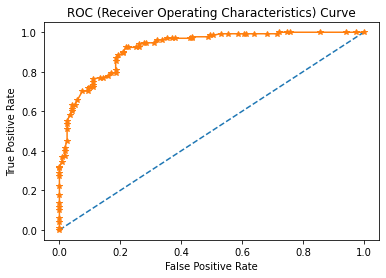

In [61]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = rf.predict_proba(X_test)
probs = probs[:,1]

auc_rf = roc_auc_score(y_test, probs)
print("AUC Score :%.3f " %auc_rf)
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0,1],[0,1], linestyle = "--")
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.show()

f1=0.809 auc_pr=0.928 ap=0.927


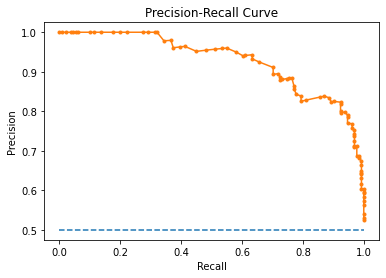

In [62]:
# Precision Recall Curve 

pred_y_test = rf.predict(X_test)                                      # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve

f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_rf_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_rf_pr, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [63]:
models.append("RF")
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_rf)

## 4. KNN - Classification

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
knn.score(X_train, y_train)

0.8226666666666667

In [67]:
knn.score(X_test, y_test)

0.76

AUC Score : 0.837


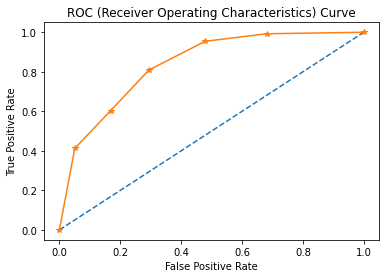

In [68]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = knn.predict_proba(X_test)
probs = probs[:,1]

auc_knn = roc_auc_score(y_test, probs)
print("AUC Score : %.3f" % auc_knn)

fpr,tpr,thresholds = roc_curve(y_test, probs)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.show()

f1=0.809 auc_pr=0.847 ap=0.805


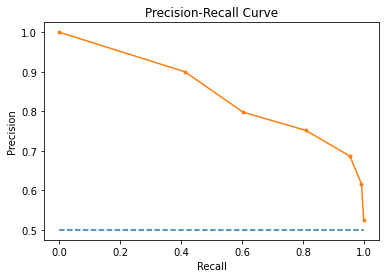

In [69]:
# Precision Recall Curve 

pred_y_test = rf.predict(X_test)                                      # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve

f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_rf_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_rf_pr, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [70]:
models.append("KNN")
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_knn)

## 5. Support Vector Machine (SVM)

In [71]:
from sklearn.svm import SVC

In [72]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [73]:
svm.score(X_train, y_train)

0.7186666666666667

In [74]:
svm.score(X_test, y_test)

0.752

AUC Score : 0.856


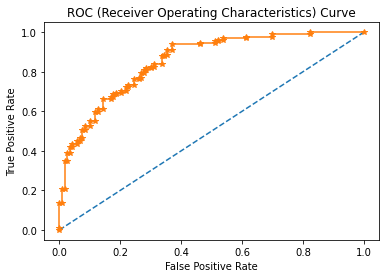

In [75]:
# ROC Curve

probs = svm.predict_proba(X_test)
probs = probs[:,1]

auc_svm = roc_auc_score(y_test, probs)
print("AUC Score : %0.3f" %auc_svm)

fpr,tpr,thresholds = roc_curve(y_test, probs)
plt.plot([0,1],[0,1], linestyle ='--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.show()

f1=0.756 auc_pr=0.863 ap=0.864


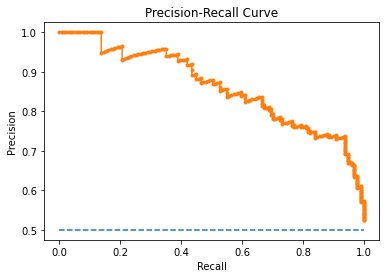

In [76]:
# Precision Recall Curve 

pred_y_test = svm.predict(X_test)                                      # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve

f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_svm_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_svm_pr, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [77]:
models.append("SVM")
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_svm)

## 6. XGBoosting

In [78]:
from xgboost import XGBClassifier

In [79]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [80]:
xgb.score(X_train, y_train)

1.0

In [81]:
xgb.score(X_test, y_test)

0.828

AUC Score : 0.895


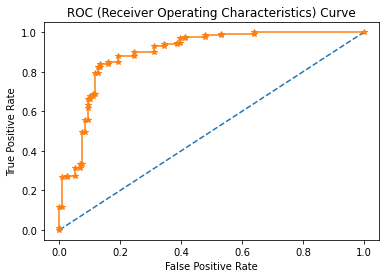

In [82]:
# ROC Curve
probs = xgb.predict_proba(X_test)
probs = probs[:,1]

auc_xgb  = roc_auc_score(y_test, probs)
print("AUC Score : %.3f" %auc_xgb)

fpr,tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0,1],[0,1], linestyle ='--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.show()

f1=0.838 auc_pr=0.881 ap=0.882


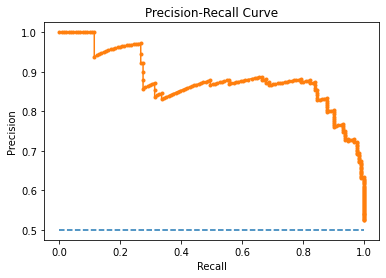

In [83]:
# Precision Recall Curve

pred_y_test = xgb.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, pred_y_test)
auc_xgb_pr = auc(recall, precision)
ap = average_precision_score(y_test, probs)                         # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_xgb_pr, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [84]:
models.append("XGB")
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_xgb)

## 7. Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [86]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [87]:
gnb.score(X_train, y_train)

0.7266666666666667

In [88]:
gnb.score(X_test, y_test)

0.748

AUC Score : 0.850


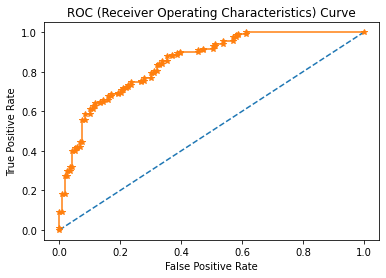

In [89]:
# ROC Curve
probs = gnb.predict_proba(X_test)
probs = probs[:,1]

auc_gnb = roc_auc_score(y_test, probs)
print("AUC Score : %.3f" %auc_gnb)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.show()

f1=0.751 auc_pr=0.853 ap=0.854


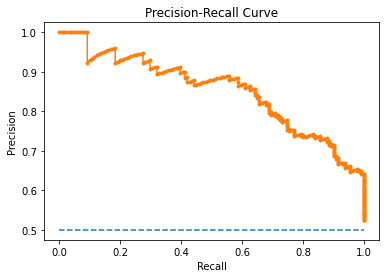

In [90]:
# Precision Recall Curve
pred_y_test = gnb.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, pred_y_test)
ap = average_precision_score(y_test, probs)
auc_gnb_pr = auc(recall, precision)
                        
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_gnb_pr, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [91]:
models.append("NB")
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_gnb)

In [92]:
model_summary = pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc), columns = ['model','accuracy','f1_score','auc'])
model_summary = model_summary.set_index('model')

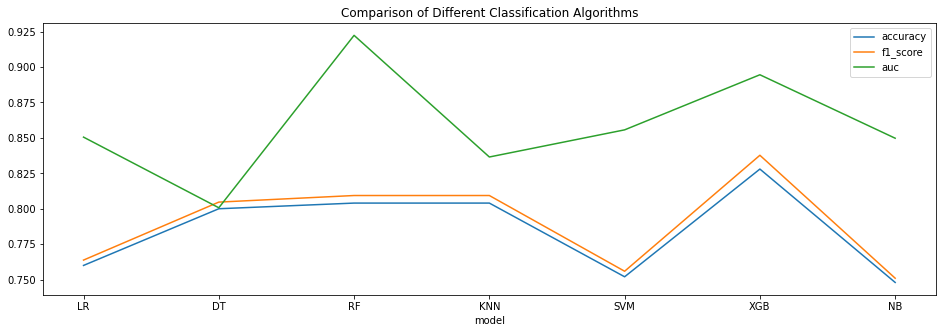

In [93]:
model_summary.plot(figsize=(16,5))
plt.title("Comparison of Different Classification Algorithms")
plt.show()

In [94]:
model_summary

,accuracy,f1_score,auc
model,,,
LR,0.760,0.763780,0.850536
DT,0.800,0.804688,0.800693
RF,0.804,0.809339,0.922349
KNN,0.804,0.809339,0.836519
SVM,0.752,0.755906,0.855667
XGB,0.828,0.837736,0.894541
NB,0.748,0.750988,0.849766


### Among all models, RandomForest has given best accuracy and f1_score. Therefore we will build final model using RandomForest.

## 1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. 
### Please be descriptive to explain what values of these parameter you have used.

In [95]:
cr = classification_report(y_test, rf.predict(X_test))
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       119
           1       0.83      0.79      0.81       131

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250



In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
cm = confusion_matrix(y_test, rf.predict(X_test))
cm

array([[ 97,  22],
       [ 27, 104]], dtype=int64)

In [98]:
TN = cm[0,0] # True Negative
TP = cm[1,1] #True Positive
FP = cm[0,1] # False Positive
FN = cm[1,0] #False Negative

Accuracy = (TP+TN)/(TN+TP+FP+FN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)  # also called Sensitivity
Specificity = TN/(TN+FP)

In [99]:
print("Accuracy: ", Accuracy)
print("Precision: ", Precision)
print("Sensitivity: ", Recall)
print("Specificity: ", Specificity)
print("AUC: ", auc_rf)

Accuracy:  0.804
Precision:  0.8253968253968254
Sensitivity:  0.7938931297709924
Specificity:  0.8151260504201681
AUC:  0.9223490923086792


## Result:
Ideally we need both high Sensitivity and high Specificity but as we know there are always trade off between the two.
So, the threshold is set based on business problem. There are some cases where Sensitivity is important and need to be near to
1 There are business cases where Specificity is important and need to be near to 1 We need to understand the business
problem and then decide the importance of Sensitivity and Specificity.